In [1]:
import pandas as pd
data = {
    'Gender' : ['Male', 'Female', 'Male', 'Female'],
    'Marital Status' : ['Married', 'Single', 'Married', 'Divorce']
}
df = pd.DataFrame(data)
df

,Gender,Marital Status
0,Male,Married
1,Female,Single
2,Male,Married
3,Female,Divorce


In [2]:
df_copy = df.copy()
df_copy

,Gender,Marital Status
0,Male,Married
1,Female,Single
2,Male,Married
3,Female,Divorce


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['MS'] = le.fit_transform(df['Marital Status'])
df

,Gender,Marital Status,MS
0,1,Married,1
1,0,Single,2
2,1,Married,1
3,0,Divorce,0


In [4]:
import seaborn as sns
corr = df.corr(numeric_only=True)
corr

,Gender,MS
Gender,1.0,0.0
MS,0.0,1.0


1. Load the dataset
2. Check the shape, info and describe of the dataset
3. Perform EDA on the dataset to check the relation between the variables, use regplots, heatmaps and boxplots
4. Check for null values and duplicates
5. Split the data in train and test dataset
6. Check for the accuracy of the model using R2 score
7. Take input of 'R&D Spend', 'Administration', 'Marketing Spend', 'State' & predict the 'Profit' of a new startup

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
# Loading the dataset

In [8]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# EDA

In [10]:
# Chk for null values

In [11]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
# Stats of the model

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [15]:
# Chk for any duplicates

In [16]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [17]:
data.duplicated().sum()

0

In [18]:
# Chk for outliers

<Axes: xlabel='R&D Spend'>

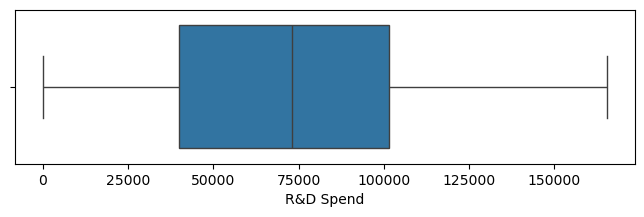

In [19]:
plt.figure(figsize=(8,2))
sns.boxplot(data['R&D Spend'], orient='h')

<Axes: xlabel='Administration'>

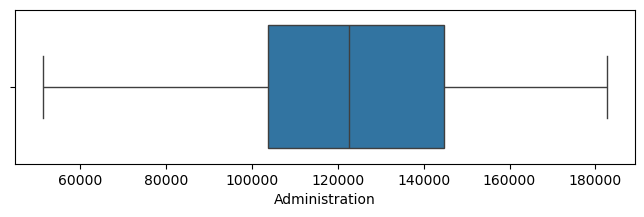

In [20]:
plt.figure(figsize=(8,2))
sns.boxplot(data['Administration'], orient='h')

<Axes: xlabel='Marketing Spend'>

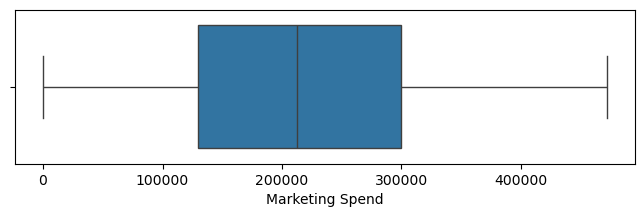

In [21]:
plt.figure(figsize=(8,2))
sns.boxplot(data['Marketing Spend'], orient='h')

In [22]:
# Heatmap for correlation

<Axes: >

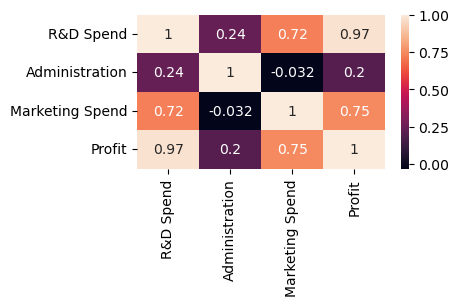

In [23]:
plt.figure(figsize=(4,2))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [24]:
# rename columns to short names

In [25]:
data = data.rename(columns={
    'R&D Spend' : 'RND', 'Administration' :'Admin', 'Marketing Spend' : 'MKT'}, inplace=False)
data.head()

,RND,Admin,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
# Check for correlation using Regplot

<Axes: xlabel='RND', ylabel='Profit'>

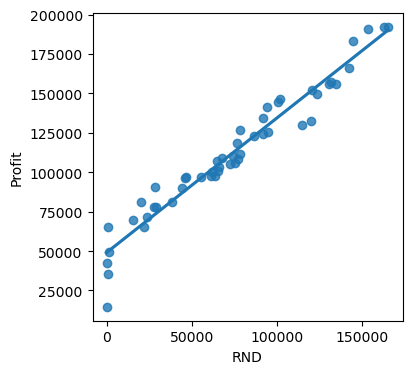

In [27]:
plt.figure(figsize=(4,4))
sns.regplot(x = 'RND', y = 'Profit', data = data, ci =0)

<Axes: xlabel='Admin', ylabel='Profit'>

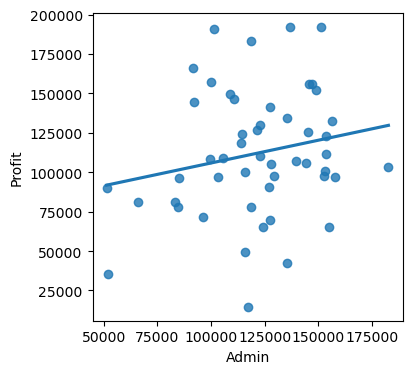

In [28]:
plt.figure(figsize=(4,4))
sns.regplot(x = 'Admin', y = 'Profit', data = data, ci =0)

<Axes: xlabel='MKT', ylabel='Profit'>

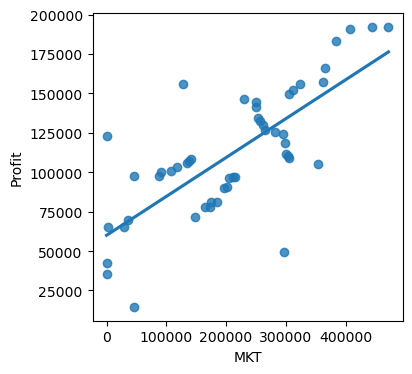

In [29]:
plt.figure(figsize=(4,4))
sns.regplot(x = 'MKT', y = 'Profit', data = data, ci =0)

In [30]:
# Check for negative values

In [31]:
data[data['RND'] < 0]

,RND,Admin,MKT,State,Profit


In [32]:
data[data['Admin'] < 0]

,RND,Admin,MKT,State,Profit


In [33]:
data[data['MKT'] < 0]

,RND,Admin,MKT,State,Profit


In [34]:
data[data['Profit'] < 0]

,RND,Admin,MKT,State,Profit


In [35]:
# Convert the string column 'State' to numeric

In [36]:
data['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
data.head()

,RND,Admin,MKT,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [38]:
data['State'].value_counts()

State
2    17
0    17
1    16
Name: count, dtype: int64

In [39]:
# Split the data into X and y

In [40]:
X = data.drop(['Profit', 'Admin'], axis = 1)
X.head()

,RND,MKT,State
0,165349.20,471784.10,2
1,162597.70,443898.53,0
2,153441.51,407934.54,1
3,144372.41,383199.62,2
4,142107.34,366168.42,1


In [41]:
y = data['Profit']
y[0:5]

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [42]:
# Split the data into train and test

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.shape

(35, 3)

In [45]:
X_test.shape

(15, 3)

In [46]:
# Build the Linear Reg model

In [47]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9520886750456267

In [50]:
# Take input from the user for a new company

In [52]:
rnd = float(input('Enter RND cost:'))
mkt = float(input('Enter MKT cost:'))
sta = int(input('Enter state 0 : California, 1 : Florida, 2 : NewYork:'))
model.predict([[rnd, mkt, sta]])

Enter RND cost: 91000.99
Enter MKT cost: 26000.18
Enter state 0 : California, 1 : Florida, 2 : NewYork: 2


array([116775.02063825])